# Convolutional Neural Network

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

 # Loading the Data Set

In [2]:
train = pd.read_csv('dataset/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('dataset/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train['label']
x_train = train.drop(labels=['label'],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

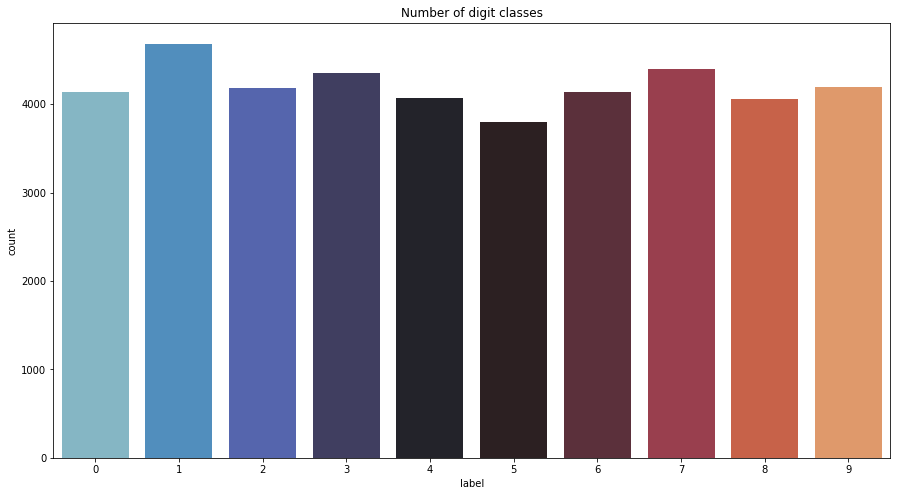

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(y_train,palette='icefire')
plt.title('Number of digit classes')
y_train.value_counts()

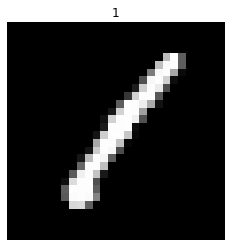

In [6]:
img = x_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train.iloc[0])
plt.axis('off')
plt.show()

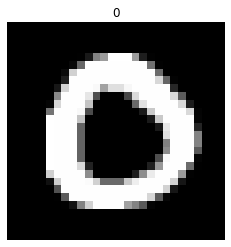

In [7]:
img = x_train.iloc[4].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train.iloc[4])
plt.axis('off')
plt.show()

# Normalization, Reshape and Label Encoding

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(test)
print("x_train shape: ",x_train.shape)
print("test shape: ",x_test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)

Using TensorFlow backend.


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2)
print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


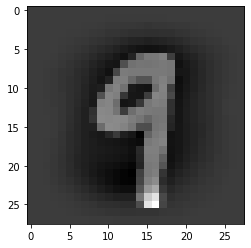

In [12]:
plt.imshow(x_train[2][:,:,0],cmap='gray')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=9,kernel_size = (5,5), padding='Same',activation = 'relu',input_shape= x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [14]:
optimizer = Adam(lr = 0.001 , beta_1 = 0.9 , beta_2= 0.999)

In [15]:
model.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
epochs = 10
batch_size = 250

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False # randomly flip images
)
datagen.fit(x_train)

In [18]:
final = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
epochs=epochs,validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]/batch_size)

Epoch 1/10
152/151 [==============================] - 13s 87ms/step - loss: 2.1464 - accuracy: 0.2162 - val_loss: 1.8500 - val_accuracy: 0.3631
Epoch 2/10
152/151 [==============================] - 13s 84ms/step - loss: 1.9549 - accuracy: 0.3105 - val_loss: 1.4669 - val_accuracy: 0.5740
Epoch 3/10
152/151 [==============================] - 13s 84ms/step - loss: 1.8062 - accuracy: 0.3780 - val_loss: 1.2071 - val_accuracy: 0.6736
Epoch 4/10
152/151 [==============================] - 13s 85ms/step - loss: 1.6939 - accuracy: 0.4207 - val_loss: 1.1079 - val_accuracy: 0.7067
Epoch 5/10
152/151 [==============================] - 13s 84ms/step - loss: 1.6053 - accuracy: 0.4600 - val_loss: 0.9415 - val_accuracy: 0.7443
Epoch 6/10
152/151 [==============================] - 13s 84ms/step - loss: 1.5299 - accuracy: 0.4853 - val_loss: 0.8012 - val_accuracy: 0.7971
Epoch 7/10
152/151 [==============================] - 13s 84ms/step - loss: 1.4750 - accuracy: 0.5069 - val_loss: 0.7510 - val_accuracy:

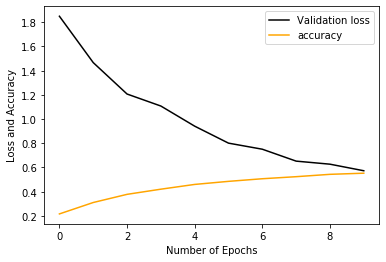

In [19]:
plt.plot(final.history['val_loss'],color='black',label='Validation loss')
plt.plot(final.history['accuracy'],color='orange',label='accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

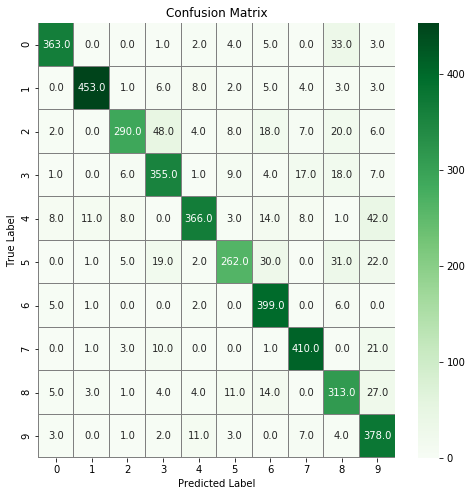

In [20]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

* http://scs.ryerson.ca/~aharley/vis/conv/flat.html